# USED CAR PRICE PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn

# Importing and mergin data

In [2]:
#Importing individual data set.

In [4]:
audi=pd.read_csv("audi.csv")
bmw=pd.read_csv("bmw.csv")
ford=pd.read_csv("ford.csv")
hyundai=pd.read_csv("hyundi.csv")
mercedes=pd.read_csv("merc.csv")
skoda=pd.read_csv("skoda.csv")

In [5]:
#Merging the individual data into one combined dataset.

In [5]:
audi["company"]="audi"
bmw["company"]="bmw"
ford["company"]="ford"
hyundai["company"]="hyundai"
mercedes["company"]="mercedes"
skoda["company"]="skoda"

In [6]:
original=[audi,bmw,ford,hyundai,mercedes,skoda]
original=pd.concat(original)
carData=original.copy()
original.to_csv('C:/Users/Reshma/Downloads/FpCarPrice/CombCarPrice_files.csv')

# Exploratoring the data

In [8]:
#Callin the data to see the contents and heading.
carData.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,NaN


In [9]:
carData.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'company', 'tax(£)'],
      dtype='object')

In [10]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63660 entries, 0 to 6266
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         63660 non-null  object 
 1   year          63660 non-null  int64  
 2   price         63660 non-null  int64  
 3   transmission  63660 non-null  object 
 4   mileage       63660 non-null  int64  
 5   fuelType      63660 non-null  object 
 6   tax           58800 non-null  float64
 7   mpg           63660 non-null  float64
 8   engineSize    63660 non-null  float64
 9   company       63660 non-null  object 
 10  tax(£)        4860 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 5.8+ MB


In [11]:
#Checking for null value
carData.isnull()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company,tax(£)
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6262,False,False,False,False,False,False,False,False,False,False,True
6263,False,False,False,False,False,False,False,False,False,False,True
6264,False,False,False,False,False,False,False,False,False,False,True
6265,False,False,False,False,False,False,False,False,False,False,True


In [12]:
# finding the null value
carData.isnull().sum()

model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax              4860
mpg                 0
engineSize          0
company             0
tax(£)          58800
dtype: int64

In [13]:
carData.shape

(63660, 11)

In [14]:
carData.corr()

C:\Users\Reshma\AppData\Local\Temp\ipykernel_20228\1312043763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  carData.corr()


,year,price,mileage,tax,mpg,engineSize,tax(£)
year,1.000000,0.502688,-0.742807,0.152861,-0.113000,-0.046322,0.271535
price,0.502688,1.000000,-0.439735,0.321530,-0.324429,0.630377,0.321028
mileage,-0.742807,-0.439735,1.000000,-0.205925,0.169661,0.097092,-0.205910
tax,0.152861,0.321530,-0.205925,1.000000,-0.417016,0.321040,NaN
mpg,-0.113000,-0.324429,0.169661,-0.417016,1.000000,-0.290353,-0.451991
engineSize,-0.046322,0.630377,0.097092,0.321040,-0.290353,1.000000,0.224927
tax(£),0.271535,0.321028,-0.205910,NaN,-0.451991,0.224927,1.000000


In [15]:
#Taking the total count
carData.count()

model           63660
year            63660
price           63660
transmission    63660
mileage         63660
fuelType        63660
tax             58800
mpg             63660
engineSize      63660
company         63660
tax(£)           4860
dtype: int64

In [16]:
#Checking for null values.
carData.isna().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax              True
mpg             False
engineSize      False
company         False
tax(£)           True
dtype: bool

In [17]:
carData.isna().sum()

model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax              4860
mpg                 0
engineSize          0
company             0
tax(£)          58800
dtype: int64

In [18]:
categoricals = list(carData.select_dtypes('object').columns)
numericals = [col for col in carData.columns if col not in categoricals]
print(categoricals)
print(numericals)

['model', 'transmission', 'fuelType', 'company']
['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'tax(£)']


In [19]:
# checking the distribution of categorical data
print(carData.model.value_counts())
print(carData.transmission.value_counts())
print(carData.fuelType.value_counts())
print(carData.company.value_counts())

 Fiesta      6557
 Focus       4588
 C Class     3747
 A Class     2561
 3 Series    2443
             ... 
200             1
220             1
230             1
 A2             1
 RS7            1
Name: model, Length: 128, dtype: int64
Manual       31222
Semi-Auto    18178
Automatic    14255
Other            5
Name: transmission, dtype: int64
Petrol      31483
Diesel      31230
Hybrid        888
Other          54
Electric        5
Name: fuelType, dtype: int64
ford        17965
mercedes    13119
bmw         10781
audi        10668
skoda        6267
hyundai      4860
Name: company, dtype: int64


# Data Visualisation

In [21]:
# Finding the most popular company

Text(0, 0.5, 'Count')

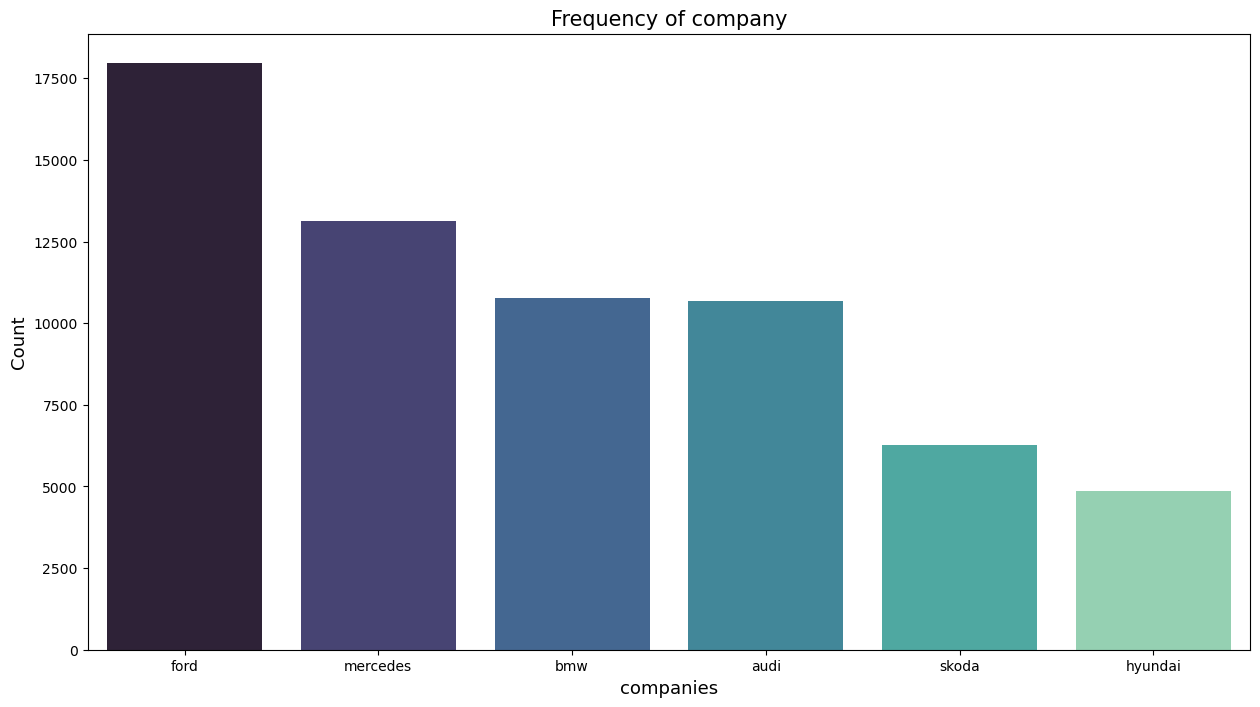

In [22]:
plt.figure(figsize=(15,8))
count_model = carData['company'].value_counts().sort_values(ascending=False)
sns.countplot(data=carData, x='company',order=count_model.index,palette="mako")
plt.title('Frequency of company',size=15)
plt.xlabel('companies',size=13)
plt.ylabel('Count',size=13)

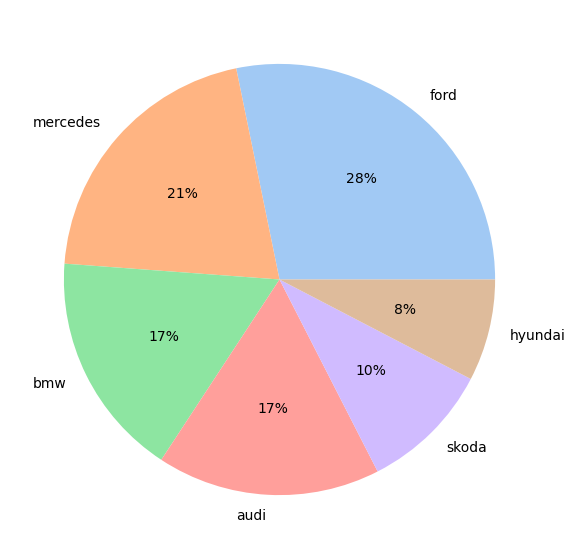

In [23]:
pie=carData["company"].value_counts().reset_index()
pie.columns=["company","count"]
plt.figure(figsize=(12,7))
color=sns.color_palette("pastel")
plt.pie(pie["count"],colors=color,autopct='%.0f%%',labels=pie["company"])
plt.show()

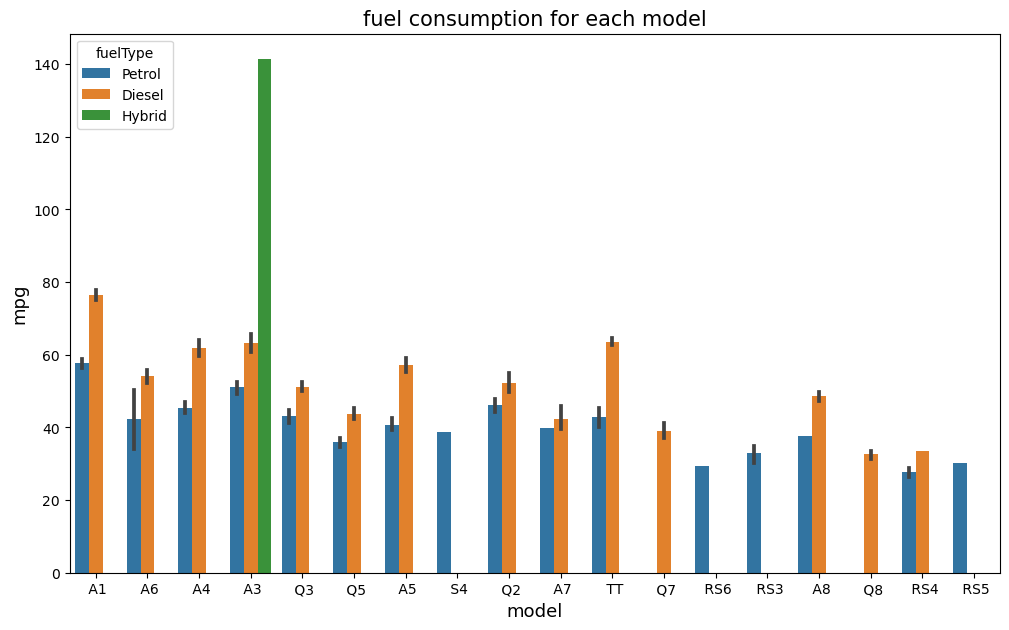

In [24]:
#Fuel consuption for each model

plt.figure(figsize=(12,7))
sns.barplot(x="model",y="mpg",data=carData[0:1000],hue="fuelType")
plt.title("fuel consumption for each model",size=15)
plt.xlabel("model",size=13)
plt.ylabel("mpg" , size=13)
plt.show()

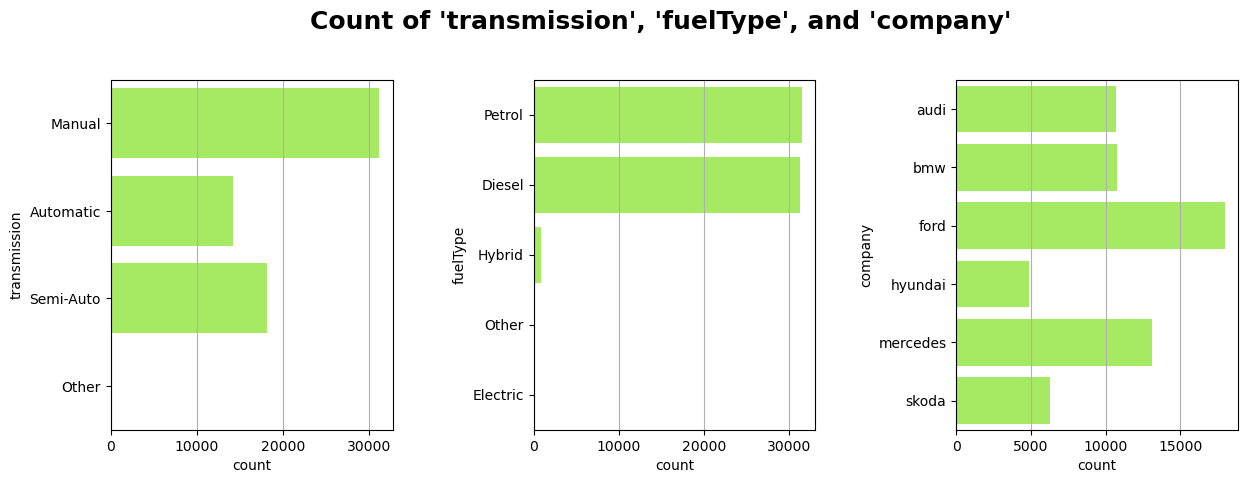

In [25]:
# Count plots for 'transmission', 'fuelType', 'Make'.
x=0
fig=plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Count of 'transmission', 'fuelType', and 'company'", x=0.4 ,y=0.95, size=18, weight='bold')
for i in carData[categoricals[1:]]:
    ax = plt.subplot(241+x)
    ax = sns.countplot(data=carData, y=i, color='#a6ff4d')
    plt.grid(axis='x')
    x+=1

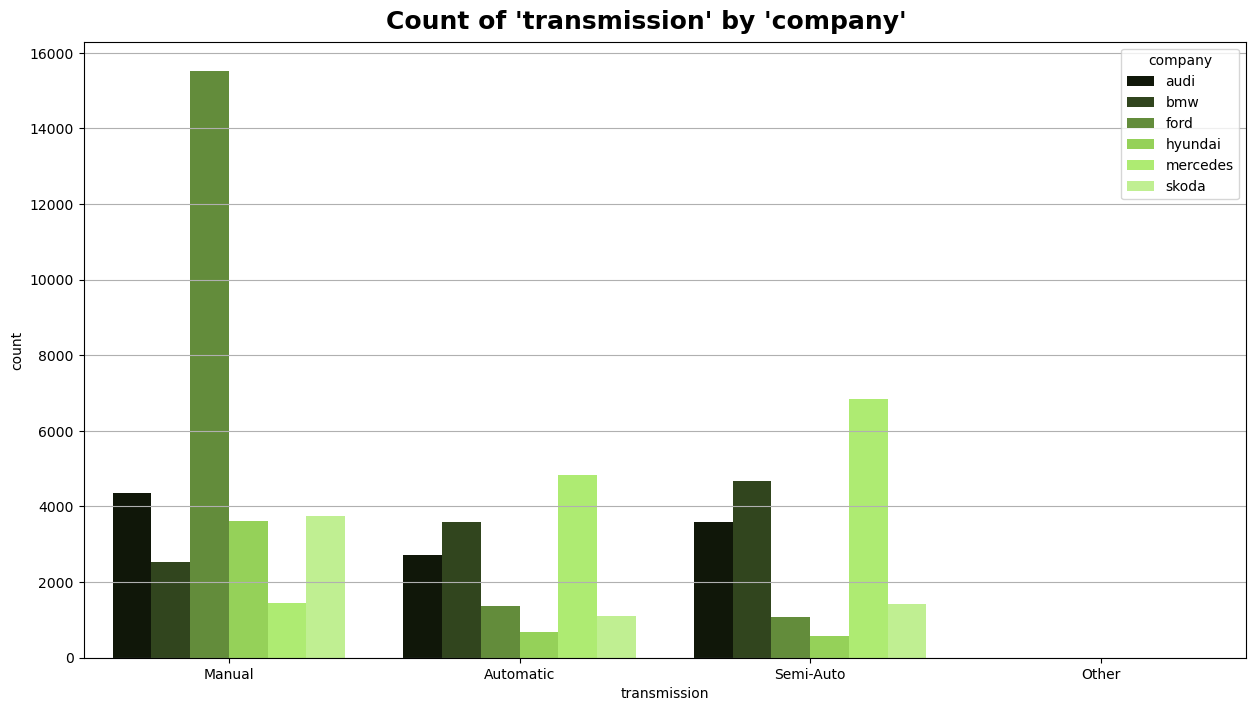

In [26]:
# Count of 'transmission' by  'Make'
colors = ['#101907', '#314c17', '#63992e', '#95e545', '#aeff5e', '#c0ff82', '#dbffb7']

fig=plt.figure(figsize=(15,8))
plt.suptitle("Count of 'transmission' by 'company'", x=0.5 ,y=0.92, size=18, weight='bold')
sns.countplot(data=carData, x='transmission', hue='company', palette=colors)
plt.grid(axis='y')

<Axes: xlabel='company', ylabel='mpg'>

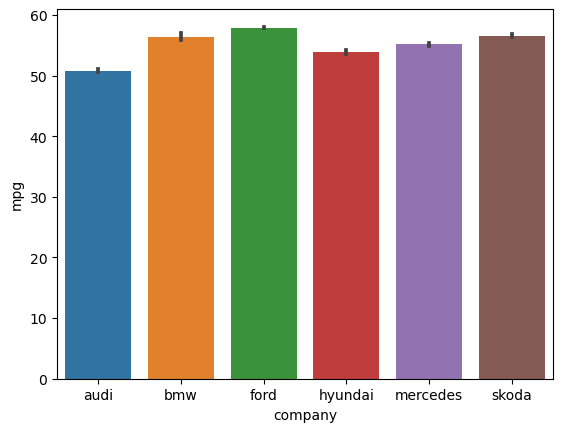

In [27]:
sns.barplot(data=carData, x='company', y='mpg')

<Axes: xlabel='fuelType', ylabel='count'>

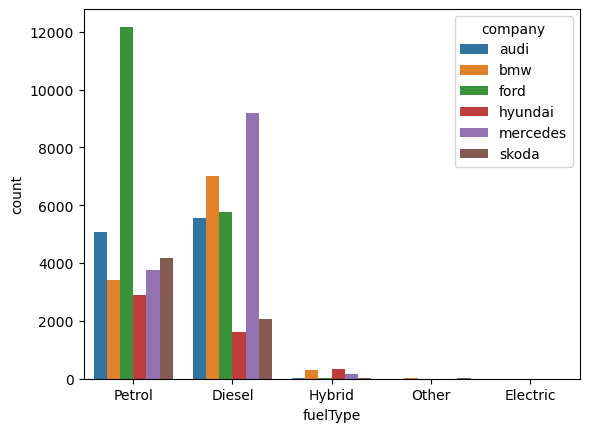

In [28]:
sns.countplot(data=carData, x='fuelType', hue='company')

# Data Cleaning

In [30]:
# checking the distribution of categorical data
print(carData.model.value_counts())
print(carData.transmission.value_counts())
print(carData.fuelType.value_counts())
print(carData.company.value_counts())

 Fiesta      6557
 Focus       4588
 C Class     3747
 A Class     2561
 3 Series    2443
             ... 
200             1
220             1
230             1
 A2             1
 RS7            1
Name: model, Length: 128, dtype: int64
Manual       31222
Semi-Auto    18178
Automatic    14255
Other            5
Name: transmission, dtype: int64
Petrol      31483
Diesel      31230
Hybrid        888
Other          54
Electric        5
Name: fuelType, dtype: int64
ford        17965
mercedes    13119
bmw         10781
audi        10668
skoda        6267
hyundai      4860
Name: company, dtype: int64


In [31]:
# encoding "Fuel_Type" Column
carData.replace({'fuelType':{'Petrol':0,'Diesel':1,'Hybrid':2, 'Other':3, 'Electric':4}},inplace=True)

# encoding "Transmission" Column
carData.replace({'transmission':{'Manual':0,'Automatic':1, 'Semi-Auto':2, 'Other':3}},inplace=True)

# encoding "Company" Column
carData.replace({'company':{'ford':0,'mercedes':1, 'bmw':2, 'audi':3, 'skoda':4, 'hyundai':5}},inplace=True)

In [32]:
carData.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company,tax(£)
0,A1,2017,12500,0,15735,0,150.0,55.4,1.4,audi,NaN
1,A6,2016,16500,1,36203,1,20.0,64.2,2.0,audi,NaN
2,A1,2016,11000,0,29946,0,30.0,55.4,1.4,audi,NaN
3,A4,2017,16800,1,25952,1,145.0,67.3,2.0,audi,NaN
4,A3,2019,17300,0,1998,0,145.0,49.6,1.0,audi,NaN


In [33]:
carData.isnull().sum()

model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax              4860
mpg                 0
engineSize          0
company             0
tax(£)          58800
dtype: int64

In [34]:
carData.drop(["tax","tax(£)"],axis=1, inplace=True)

In [35]:
carData.dtypes

model            object
year              int64
price             int64
transmission      int64
mileage           int64
fuelType          int64
mpg             float64
engineSize      float64
company          object
dtype: object

In [36]:
carData.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,company
0,A1,2017,12500,0,15735,0,55.4,1.4,audi
1,A6,2016,16500,1,36203,1,64.2,2.0,audi
2,A1,2016,11000,0,29946,0,55.4,1.4,audi
3,A4,2017,16800,1,25952,1,67.3,2.0,audi
4,A3,2019,17300,0,1998,0,49.6,1.0,audi


In [37]:
# Calculating the age of car
carData.head(1)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,company
0,A1,2017,12500,0,15735,0,55.4,1.4,audi


In [38]:
#Changing the registration year to age of the car.
import datetime
date_time = datetime.datetime.now()
carData['Age']=date_time.year - carData['year']

In [39]:
carData.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,company,Age
0,A1,2017,12500,0,15735,0,55.4,1.4,audi,6
1,A6,2016,16500,1,36203,1,64.2,2.0,audi,7
2,A1,2016,11000,0,29946,0,55.4,1.4,audi,7
3,A4,2017,16800,1,25952,1,67.3,2.0,audi,6
4,A3,2019,17300,0,1998,0,49.6,1.0,audi,4


In [40]:
carData.drop('year',axis=1,inplace=True)
carData.head()

,model,price,transmission,mileage,fuelType,mpg,engineSize,company,Age
0,A1,12500,0,15735,0,55.4,1.4,audi,6
1,A6,16500,1,36203,1,64.2,2.0,audi,7
2,A1,11000,0,29946,0,55.4,1.4,audi,7
3,A4,16800,1,25952,1,67.3,2.0,audi,6
4,A3,17300,0,1998,0,49.6,1.0,audi,4


In [41]:
from matplotlib import pyplot

In [42]:
#Correlation of the data
carData.corr()

C:\Users\Reshma\AppData\Local\Temp\ipykernel_20228\1312043763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  carData.corr()


,price,transmission,mileage,fuelType,mpg,engineSize,Age
price,1.000000,0.519725,-0.439735,0.161291,-0.324429,0.630377,-0.502688
transmission,0.519725,1.000000,-0.157010,0.220272,-0.160342,0.463634,-0.197443
mileage,-0.439735,-0.157010,1.000000,0.220201,0.169661,0.097092,0.742807
fuelType,0.161291,0.220272,0.220201,1.000000,0.374185,0.418852,0.076784
mpg,-0.324429,-0.160342,0.169661,0.374185,1.000000,-0.290353,0.113000
engineSize,0.630377,0.463634,0.097092,0.418852,-0.290353,1.000000,0.046322
Age,-0.502688,-0.197443,0.742807,0.076784,0.113000,0.046322,1.000000


C:\Users\Reshma\AppData\Local\Temp\ipykernel_20228\3785315760.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = carData.corr().round(2)


<Axes: >

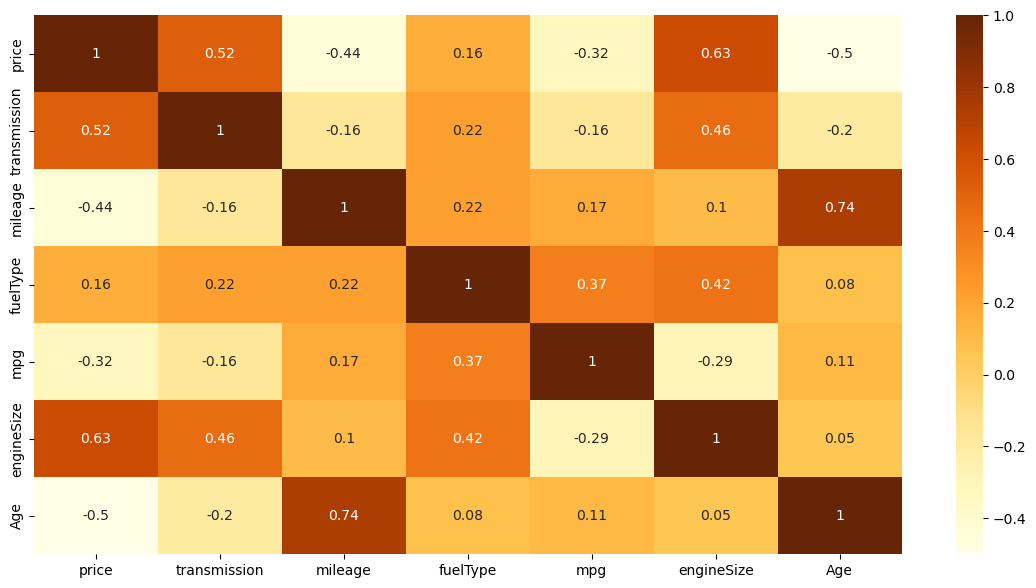

In [43]:
correlation = carData.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

# Spliting Data

In [45]:
dfm = carData._get_numeric_data()

In [46]:
y = dfm["price"]
X = dfm.drop("price", axis = 1)
dfm.shape

(63660, 7)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
#train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("test sample :", x_test.shape[0])
print("training sample :", x_train.shape[0])

test sample : 12732
training sample : 50928


# Modeling

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import AdaBoostRegressor

lrn = LinearRegression()     
rfr = RandomForestRegressor()

# Random Forest

In [52]:
rfr.fit(x_train, y_train)
rfr.fit(x_test, y_test)

y_pred_test = rfr.predict(x_test)
y_pred_train = rfr.predict(x_train)

rfr_r2 = r2_score(y_test, y_pred_test)
rfr_mae = mean_absolute_error(y_test, y_pred_test)

print("R-squared value for test is:", r2_score(y_test, y_pred_test))
print("R- square value for train is:", r2_score(y_train, y_pred_train))

R-squared value for test is: 0.9835574559261062
R- square value for train is: 0.8922410833587191


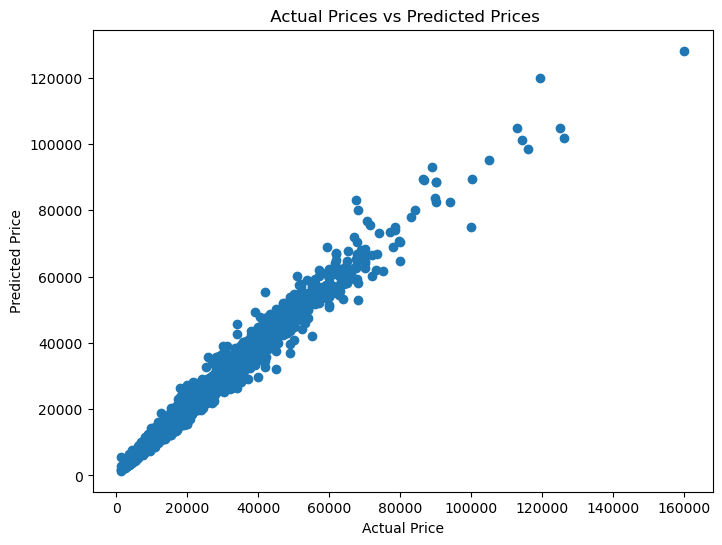

In [53]:
width = 8
height = 6
plt.figure(figsize=(width, height))
plt.scatter(x= y_test, y= y_pred_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Linear regression

In [55]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
train_data_prediction = lr_model.predict(x_train)

# R squared Error
error_score = metrics.r2_score(y_train, train_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7211566270180357


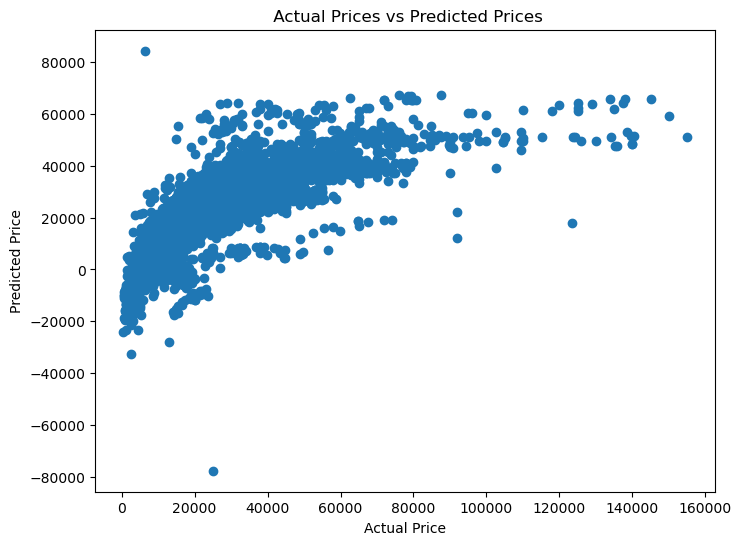

In [56]:
width = 8
height = 6
plt.figure(figsize=(width, height))
plt.scatter(x= y_train, y= train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [57]:
# prediction on Testing data
test_data_pred = lr_model.predict(x_test)
error_score = metrics.r2_score(y_test, test_data_pred)

lr_r2 = r2_score(y_test, test_data_pred)
lr_mae = mean_absolute_error(y_test, test_data_pred)

print("R squared Error : ", error_score)

R squared Error :  0.737046520953694


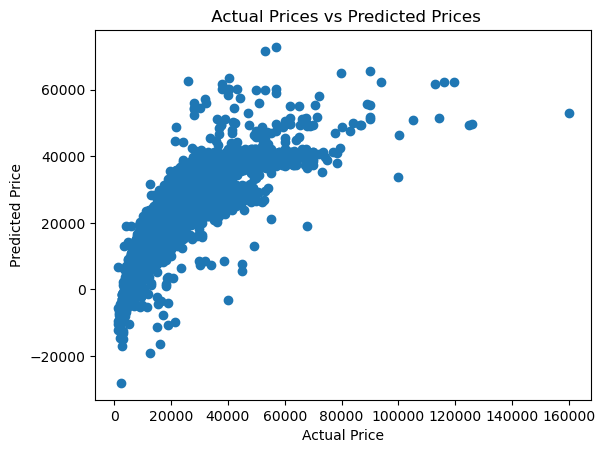

In [58]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# XGBoost

In [60]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

In [61]:
xgb_model = xgb.XGBRegressor()

# Initiate the best model
xgb_model_best = xgb.XGBRegressor(max_depth=10, min_samples_split=10)

# Fit the best model
xgb_bst = xgb_model_best.fit(x_train, y_train)

[19:48:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



In [62]:
# Make predictions
xgb_y_pred = xgb_bst.predict(x_test)

# Performance metrics
xgb_r2 = r2_score(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)

# Show the model performance
print("XGB R2: ", xgb_r2)
print("XGB MAE: ", xgb_mae)

XGB R2:  0.9239784760141071
XGB MAE:  1846.3105774980427


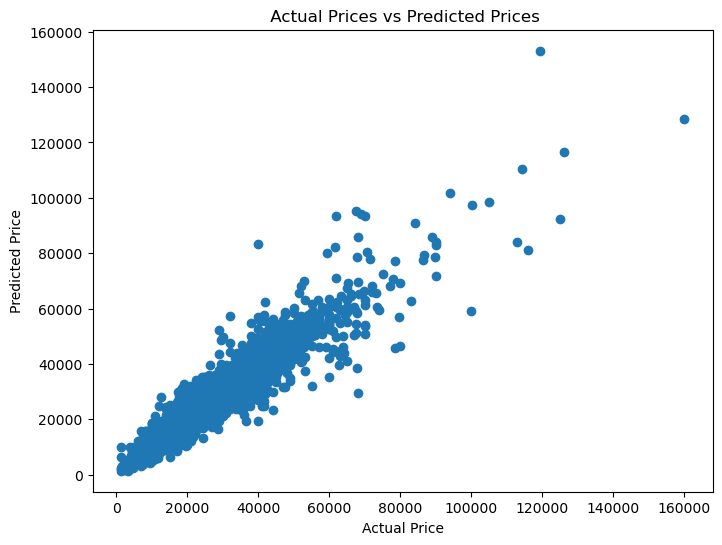

In [63]:
width = 8
height = 6
plt.figure(figsize=(width, height))
plt.scatter(x= y_test, y= xgb_y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Lasso Boost

In [66]:
from sklearn.linear_model import Lasso

In [67]:
lass_reg_model = Lasso()
lass_reg_model.fit(x_train,y_train)

Lasso()

R squared Error :  0.7211564690503901


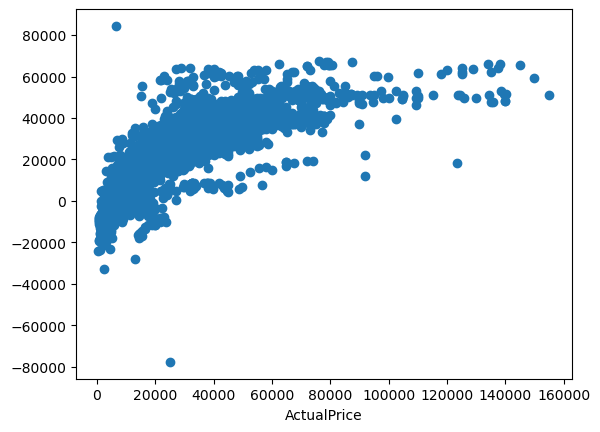

In [68]:
#Train data
train_data_prediction = lass_reg_model.predict(x_train)
# R squared Error
error_score = metrics.r2_score(y_train, train_data_prediction)
print("R squared Error : ", error_score)

#visualisation
plt.scatter(y_train, train_data_prediction)
plt.xlabel ('ActualPrice')
# plt.ylabel ('Predicted Price')
# plt.title ('Actual Prices vs Predicted Prices')
plt.show()

R squared Error :  0.7370463933082435


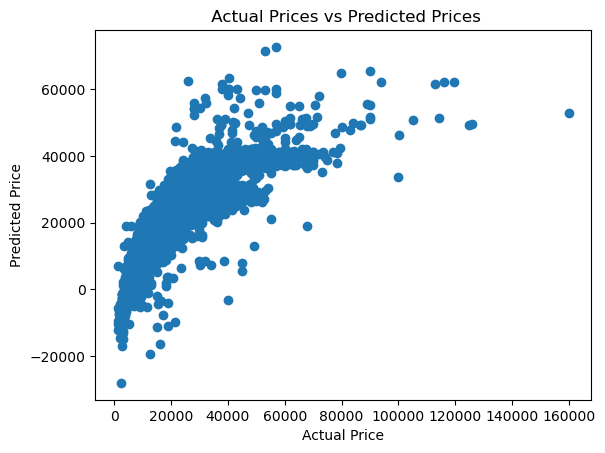

In [69]:
#Test data
test_data_pred = lass_reg_model.predict(x_test)
# R squared Error
error_score = metrics.r2_score(y_test, test_data_pred)

lass_r2 = r2_score(y_test, test_data_pred )
lass_mae = mean_absolute_error(y_test, test_data_pred )

print("R squared Error : ", error_score)

plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
# traing the model with the data
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
y_pred_test = tree_reg.predict(x_test)

tree_r2 = r2_score(y_test, y_pred_test)
tree_mae = mean_absolute_error(y_test, y_pred_test)
tree_reg.score(x_test, y_test)
print("MAE:",tree_mae)
print("R-squared :",tree_r2 )

MAE: 2272.1830958195123
R-squared : 0.8800906053918146


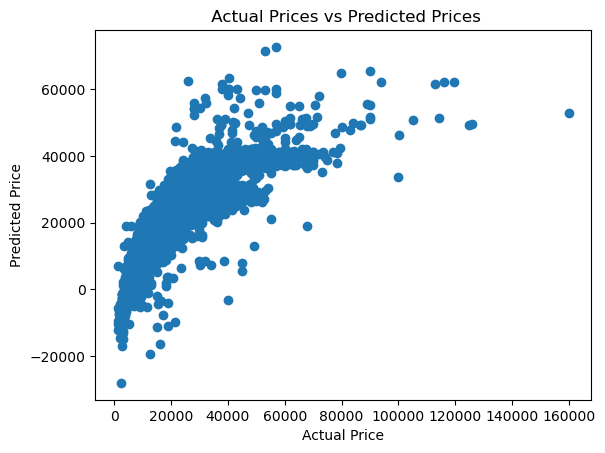

In [73]:
plt.scatter(y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Accuracy of all the models

In [74]:
# printing the accuracy of all the models
result_table = pd.DataFrame([[np.mean(lr_r2), np.mean(lr_mae)],
                             [np.mean(rfr_r2), np.mean(rfr_mae)],
                             [np.mean(xgb_r2), np.mean(xgb_mae)],
                             [np.mean(lass_r2), np.mean(lass_mae)],
                             [np.mean(tree_r2), np.mean(tree_mae)]],
                            columns=['R2', 'MAE'],
                            index=["Linear Regression","Randon Forest","XGBoost","Lasso Regression","Decision Tree"])
pd.options.display.precision = 3
result_table

,R2,MAE
Linear Regression,0.737,3592.219
Randon Forest,0.984,806.409
XGBoost,0.924,1846.311
Lasso Regression,0.737,3592.185
Decision Tree,0.880,2272.183


# Saving the best model

In [75]:
#Saving the model for web app
rfr = RandomForestRegressor()
rfr_final = rfr.fit(X,y)
type(rfr_final)

sklearn.ensemble._forest.RandomForestRegressor

In [78]:
import pickle
# open a file, where you ant to store the data
with open('random_forest_model_test.sav','wb') as file:
    # dump information to that file
    pickle.dump(rfr_final,file)


# Doing a test prediction with Random Forest

In [82]:
# open saved model 
with open('random_forest_model_test.sav','rb') as file:
    aded_model = pickle.load(file)
    
aded_model = pickle.load(open('random_forest_model_test2.sav', 'rb'))

In [83]:
#predicting new price
import pandas as pd
data_new = pd.DataFrame({
    'transmission':0,
    'mileage':15735,
    'fuelType':0,
    'mpg':55.4,
    'engineSize':21.4,
    'Age':6
},index=[0])

In [84]:
aded_model.predict(data_new)

array([16212.88])